In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load dataset
df = pd.read_csv("edacolumn.csv")

In [47]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

Dataset shape: (111, 11)
Columns: Index(['State', 'Antenatal_4_visits', 'Anaemia_Women',
       'Institutional_Delivery', 'Home_Delivery', 'Neonatal_Mortality',
       'Infant_Mortality', 'Under5_Mortality', 'Female_Literacy',
       'Women_Autonomy', 'Wealth_Index'],
      dtype='object')


In [48]:
df["State"] = df["State"].astype(str)

Antenatal Care Coverage

/var/folders/ht/nmq42dgn7qv_gb6fg6zcg1640000gn/T/ipykernel_43627/1912354146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="State", x="Antenatal_4_visits", data=df, palette="viridis")


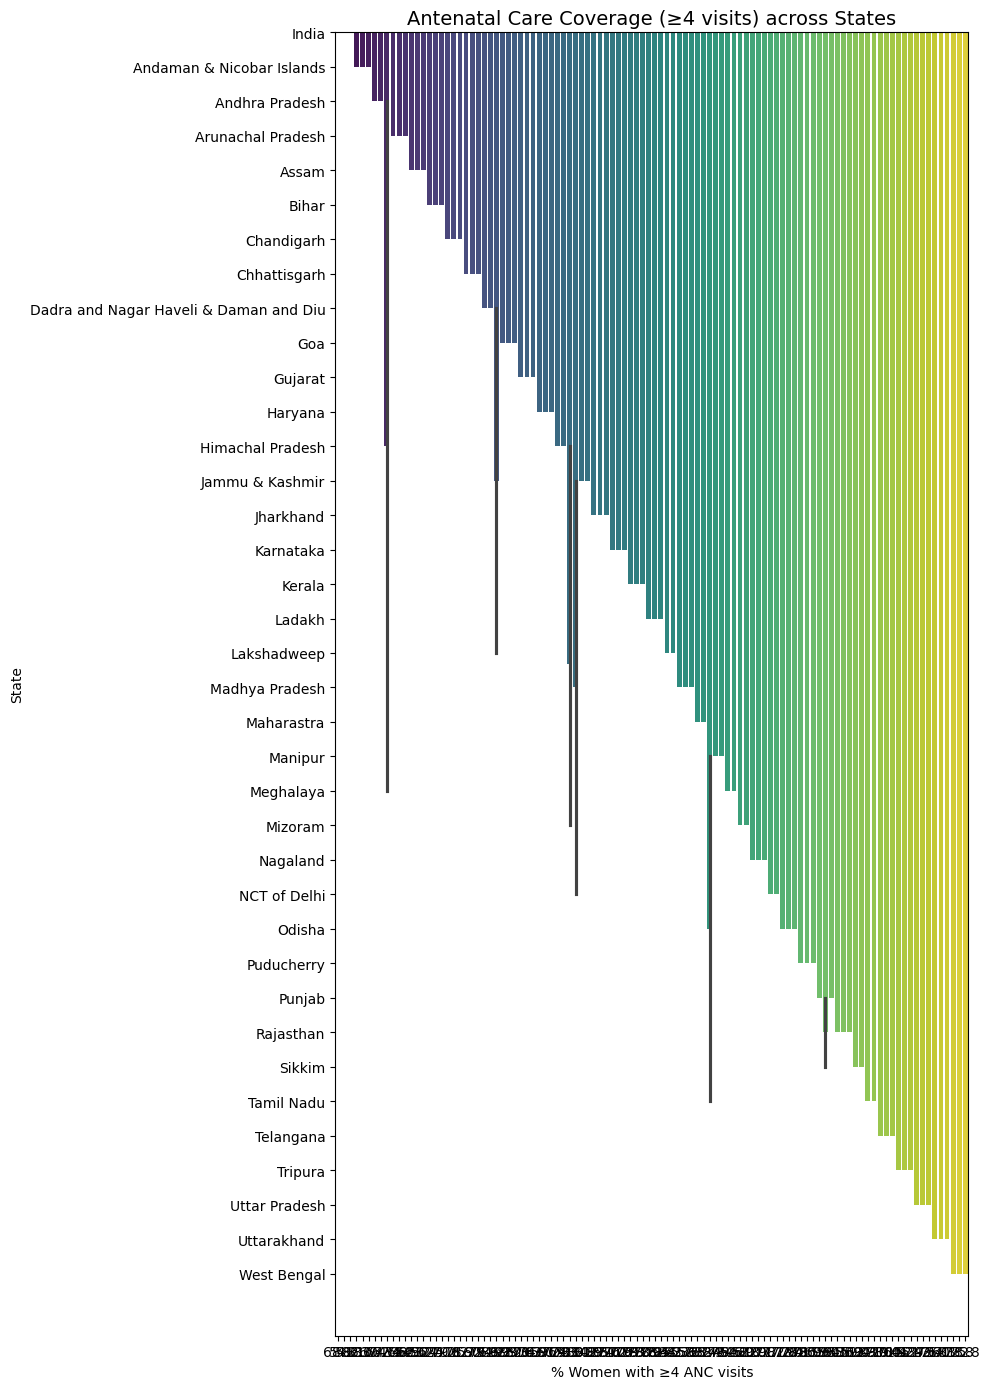

In [49]:
plt.figure(figsize=(10,14))
sns.barplot(y="State", x="Antenatal_4_visits", data=df, palette="viridis")
plt.title("Antenatal Care Coverage (≥4 visits) across States", fontsize=14)
plt.xlabel("% Women with ≥4 ANC visits")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Women with Anaemia

/var/folders/ht/nmq42dgn7qv_gb6fg6zcg1640000gn/T/ipykernel_43627/4157916349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="State", x="Anaemia_Women", data=df, palette="coolwarm")


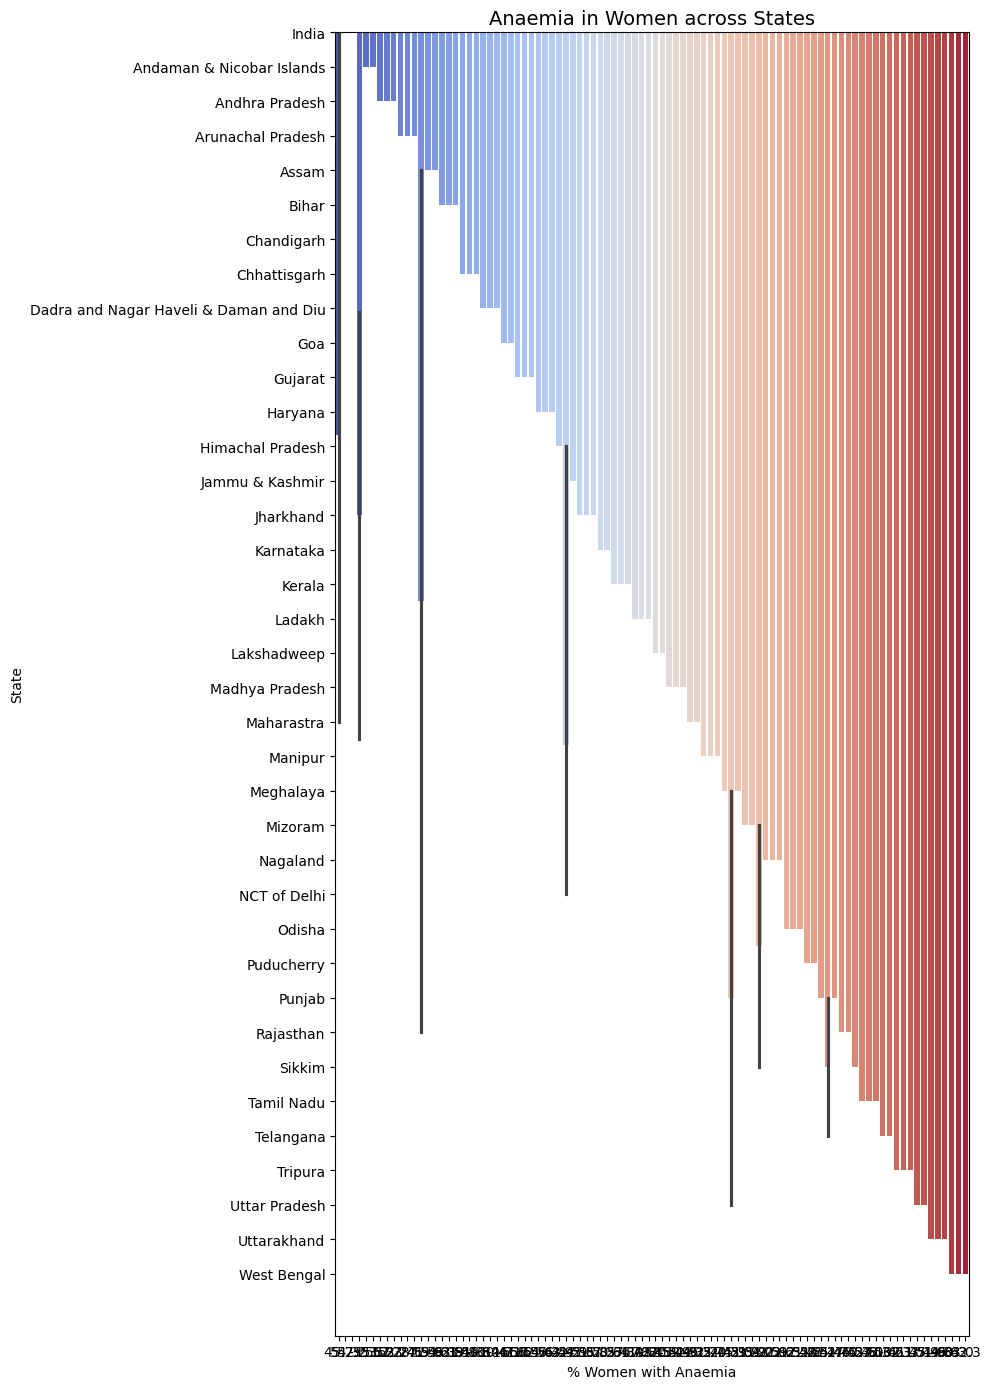

In [50]:
plt.figure(figsize=(10,14))
sns.barplot(y="State", x="Anaemia_Women", data=df, palette="coolwarm")
plt.title("Anaemia in Women across States", fontsize=14)
plt.xlabel("% Women with Anaemia")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Place of Delivery (Institutional vs Home)

In [51]:
df_melted = df.melt(id_vars="State", 
                    value_vars=["Institutional_Delivery","Home_Delivery"],
                    var_name="DeliveryType", value_name="Percentage")

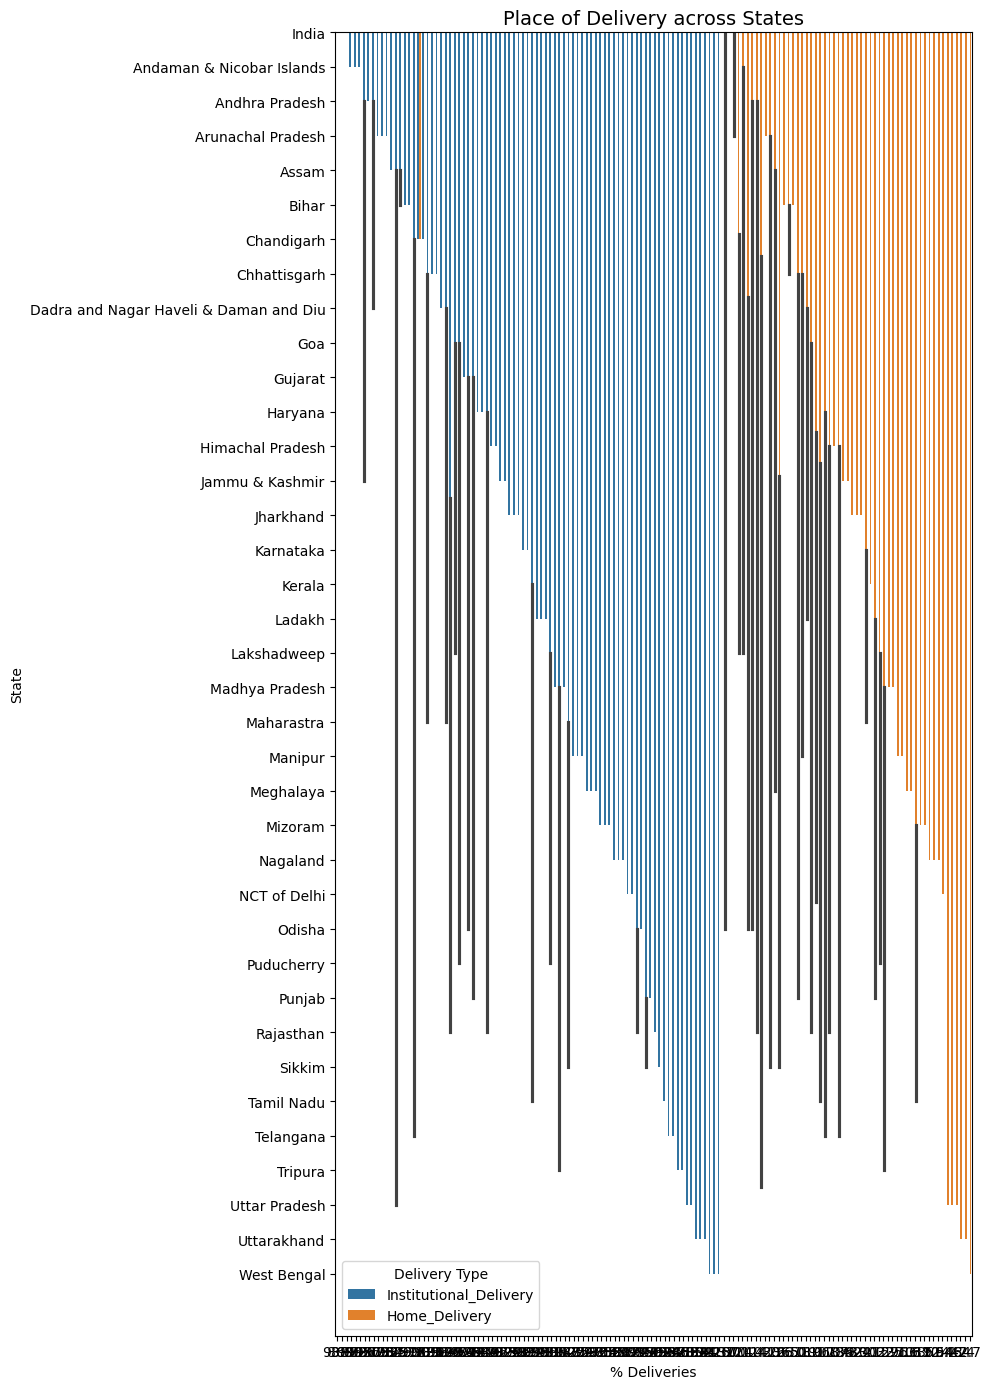

In [52]:
plt.figure(figsize=(10,14))
sns.barplot(y="State", x="Percentage", hue="DeliveryType", data=df_melted)
plt.title("Place of Delivery across States", fontsize=14)
plt.xlabel("% Deliveries")
plt.ylabel("State")
plt.legend(title="Delivery Type")
plt.tight_layout()
plt.show()

Child Mortality (Infant, Neonatal, Under-5)

In [53]:
mortality_cols = ["Infant_Mortality", "Neonatal_Mortality", "Under5_Mortality"]

In [54]:
df[mortality_cols] = df[mortality_cols].apply(pd.to_numeric, errors="coerce")

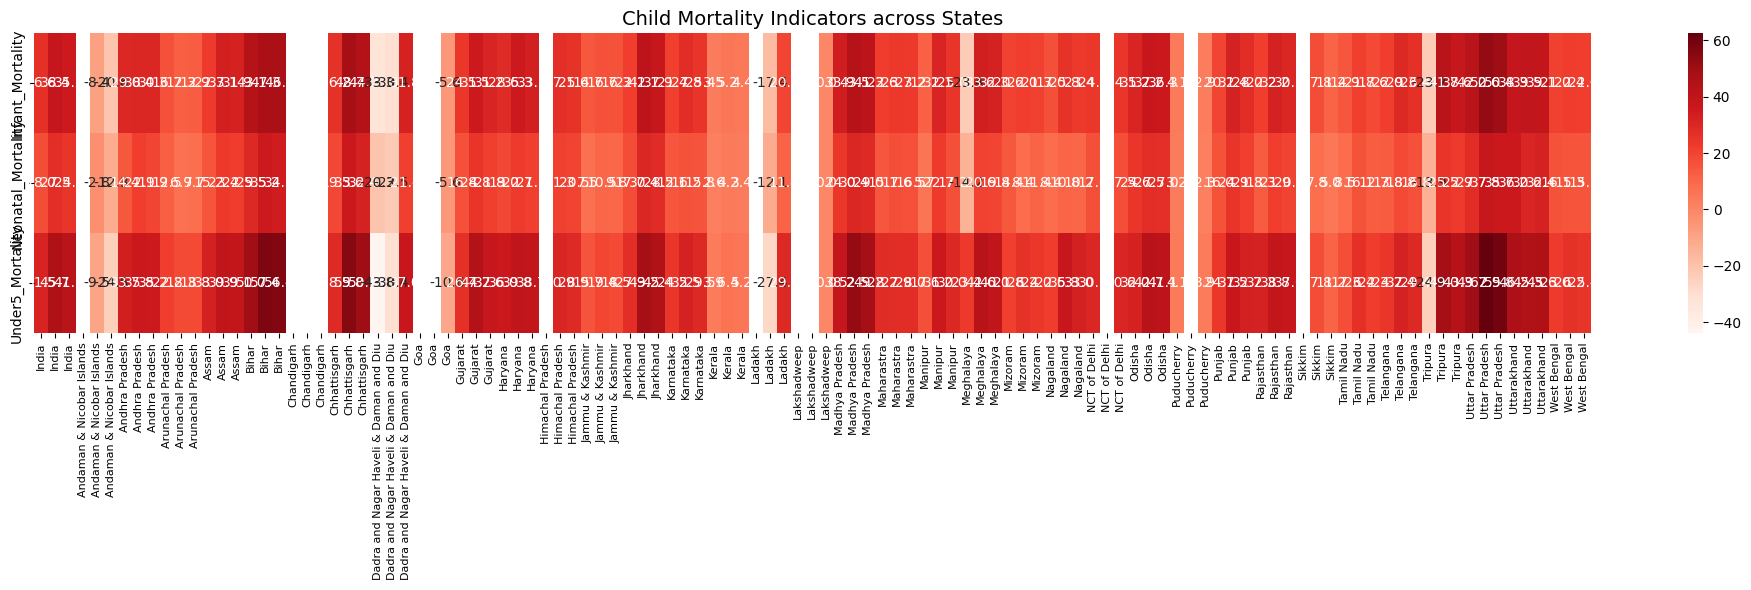

In [55]:
plt.figure(figsize=(20,6))  
sns.heatmap(df[mortality_cols].T, annot=True, cmap="Reds", cbar=True, 
            xticklabels=df["State"], yticklabels=mortality_cols, fmt=".1f")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.title("Child Mortality Indicators across States", fontsize=14)
plt.tight_layout()
plt.show()

Female Education vs Maternal Care

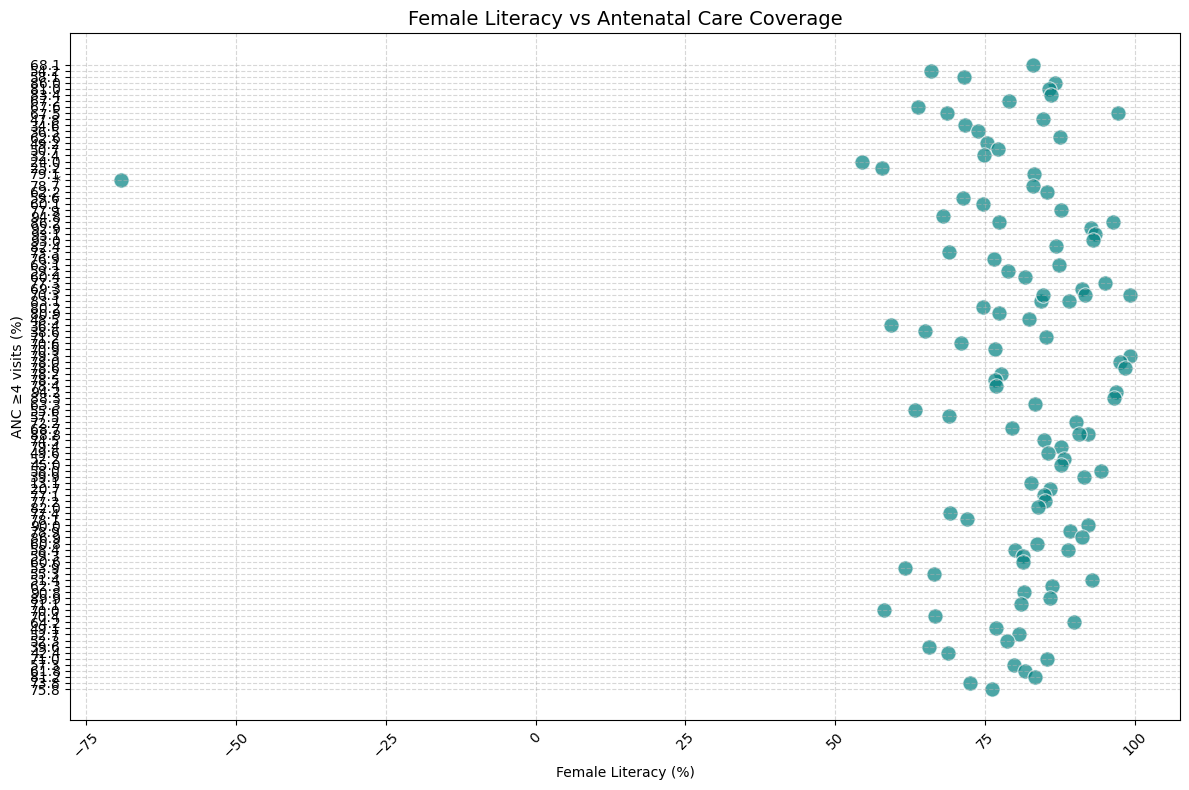

In [56]:
plt.figure(figsize=(12,8))  # bigger for clarity
sns.scatterplot(x="Female_Literacy", y="Antenatal_4_visits", 
                data=df, s=120, color="teal", alpha=0.7)
plt.title("Female Literacy vs Antenatal Care Coverage", fontsize=14)
plt.xlabel("Female Literacy (%)")
plt.ylabel("ANC ≥4 visits (%)")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Decision-Making Autonomy of Women

/var/folders/ht/nmq42dgn7qv_gb6fg6zcg1640000gn/T/ipykernel_43627/3815142878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="State", x="Women_Autonomy", data=df, palette="magma")


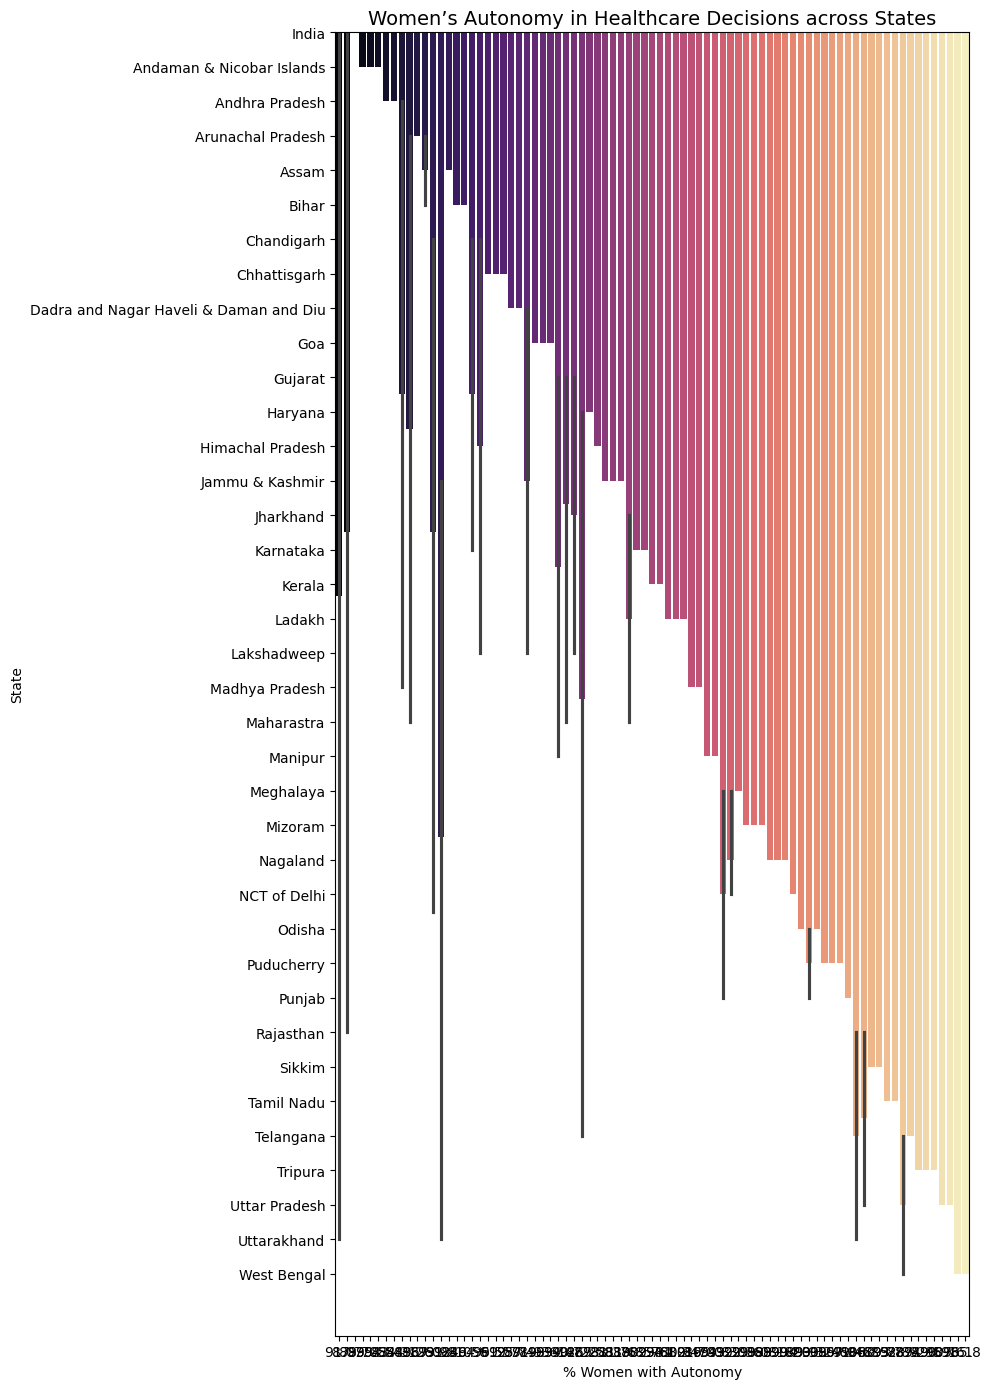

In [57]:
plt.figure(figsize=(10,14))
sns.barplot(y="State", x="Women_Autonomy", data=df, palette="magma")
plt.title("Women’s Autonomy in Healthcare Decisions across States", fontsize=14)
plt.xlabel("% Women with Autonomy")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Socio-Economic & Health Risk Link

/var/folders/ht/nmq42dgn7qv_gb6fg6zcg1640000gn/T/ipykernel_43627/2545942870.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


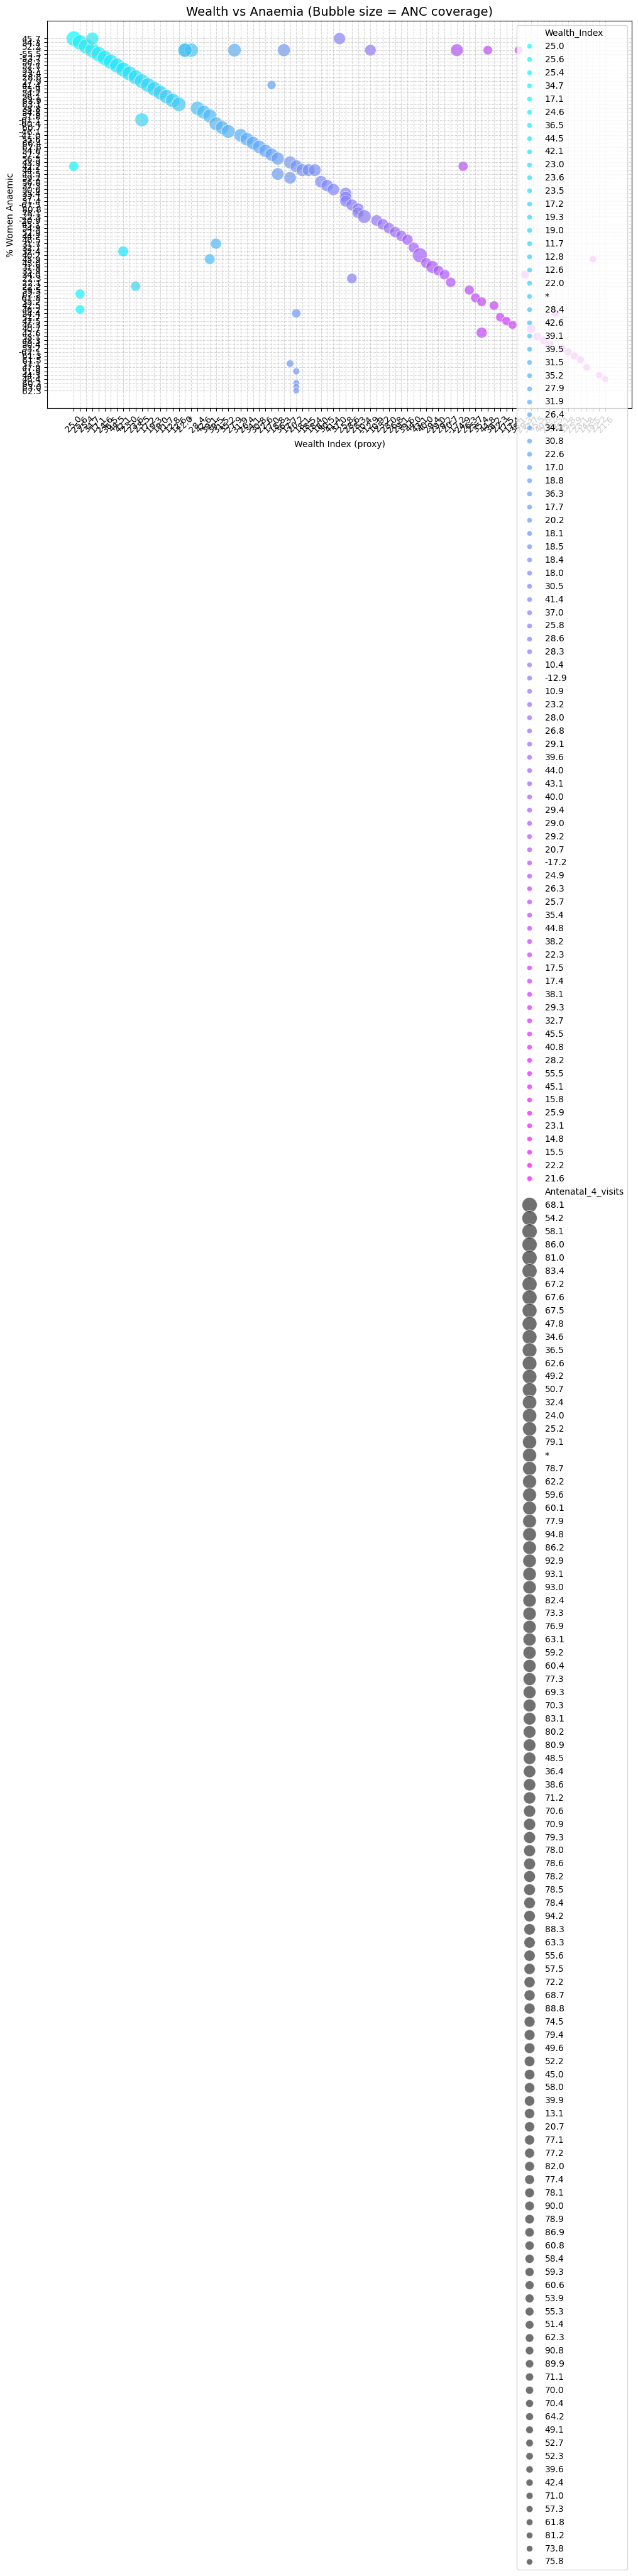

In [58]:
plt.figure(figsize=(12,8))  
sns.scatterplot(x="Wealth_Index", y="Anaemia_Women", data=df, 
                size="Antenatal_4_visits", hue="Wealth_Index", 
                sizes=(50,300), palette="cool", alpha=0.7)
plt.title("Wealth vs Anaemia (Bubble size = ANC coverage)", fontsize=14)
plt.xlabel("Wealth Index (proxy)")
plt.ylabel("% Women Anaemic")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()